# Bir Mağazanın Satış-Müşteri Verilerinin İncelenmesi

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')

In [3]:
df.shape

(9134, 24)

9134 müşteriye ait verimiz var

In [4]:
df.head(6)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,...,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize


In [5]:
df.tail(7)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
9127,TF56202,California,5032.165498,No,Basic,College,2/12/11,Employed,M,66367,...,48,0,3,Personal Auto,Personal L3,Offer2,Call Center,307.200000,Two-Door Car,Small
9128,YM19146,California,4100.398533,No,Premium,College,1/6/11,Employed,F,47761,...,58,0,1,Personal Auto,Personal L2,Offer1,Branch,541.282007,Four-Door Car,Large
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large
9133,Y167826,California,2611.836866,No,Extended,College,2/14/11,Unemployed,M,0,...,90,0,1,Corporate Auto,Corporate L3,Offer4,Call Center,369.600000,Two-Door Car,Medsize


Y değişkenimiz olarak 'Engaged' kolonuna 'Response' kolonundaki Yes ve No değerlerini 1 ve 0 olarak encode edelim

In [7]:
# Encode the y variable as 1 for'Yes'and as 0 for'No'
df['Engaged']=df['Response'].apply(lambda x:0 if x=='No' else 1)
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Engaged
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,0
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,0
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,0
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,0
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,0


# Data Analizleri

In [8]:
list(df.columns)

['Customer',
 'State',
 'Customer Lifetime Value',
 'Response',
 'Coverage',
 'Education',
 'Effective To Date',
 'EmploymentStatus',
 'Gender',
 'Income',
 'Location Code',
 'Marital Status',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Total Claim Amount',
 'Vehicle Class',
 'Vehicle Size',
 'Engaged']

**Engagement Oranı**

In [11]:
engagement_rate_df=pd.DataFrame(df.groupby('Engaged').count()['Response']/df.shape[0]*100)

In [12]:
engagement_rate_df

,Response
Engaged,
0,85.679877
1,14.320123


**Transpozunu alma**

In [13]:
engagement_rate_df.T

Engaged,0,1
Response,85.679877,14.320123


Müşterilerin %14 çağrılara cevap vermiş, %86 çağrılara cevap vermemiş

* *Renew Offer Type* kolonuna göre pivot_table oluşturalım

aggfun metodu uygulamak istediğimiz birleştirme tipini sağlar. Biz her bir müşteri grubunu basitçe toplamak için len fonksiyonunu kullanacağız

In [14]:
engagement_by_offer_type_df= pd.pivot_table(
df, values='Response', index='Renew Offer Type',columns='Engaged', aggfunc=len).fillna(0.0)

In [17]:
engagement_by_offer_type_df.columns=['Not Engaged','Engaged']

In [18]:
engagement_by_offer_type_df

,Not Engaged,Engaged
Renew Offer Type,,
Offer1,3158.0,594.0
Offer2,2242.0,684.0
Offer3,1402.0,30.0
Offer4,1024.0,0.0


Tekliflere göre müşteri sadakatini gösteren yeni dağılımı görselleştirelim

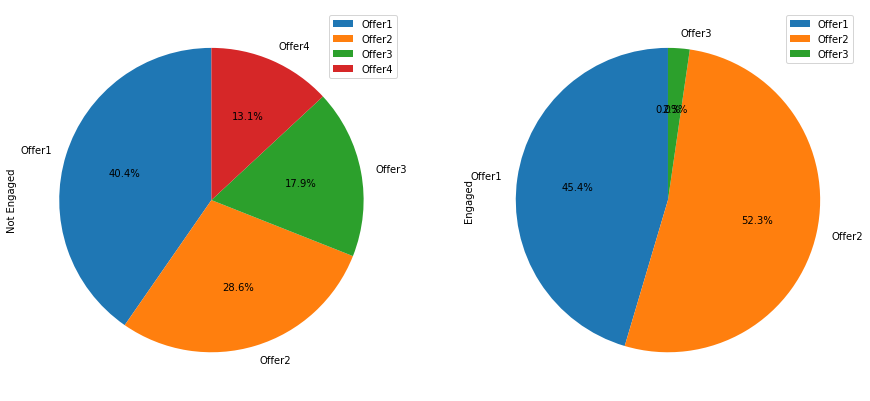

In [21]:
engagement_by_offer_type_df.plot(
kind='pie',
figsize=(15,7),
startangle=90,
subplots=True,
autopct=lambda x:'%0.1f%%' % x)
plt.show()

# Satış kanalına göre pivot_table oluşturma

In [22]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Engaged'],
      dtype='object')

In [23]:
engagement_by_sales_channel_df=pd.pivot_table(
df, values='Response',index='Sales Channel',columns='Engaged', aggfunc=len).fillna(0.0)
engagement_by_sales_channel_df

Engaged,0,1
Sales Channel,,
Agent,2811,666
Branch,2273,294
Call Center,1573,192
Web,1169,156


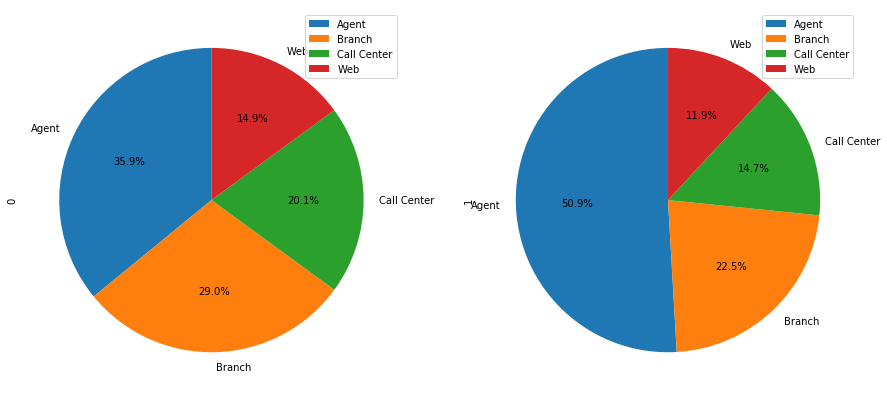

In [24]:
engagement_by_sales_channel_df.plot(
kind='pie',
figsize=(15,7),
startangle=90,
subplots=True,
autopct=lambda x:'%0.1f%%' % x)
plt.show()

# Toplam Talep Miktarı Dağılımı

Boxplot ile toplam talep miktarı dağılımının sadık müşteri ve sadık olmayan müşterideki dağılımlarını görelim

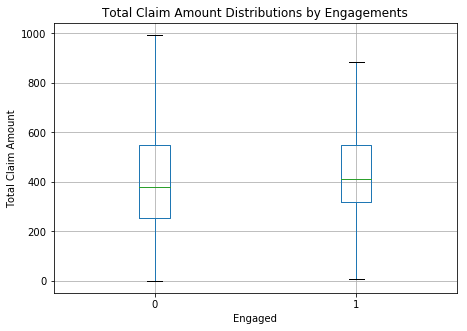

In [28]:
ax=df[['Engaged','Total Claim Amount']].boxplot(
by='Engaged',
showfliers=False,
figsize=(7,5))
ax.set_xlabel('Engaged')
ax.set_ylabel('Total Claim Amount')
ax.set_title('Total Claim Amount Distributions by Engagements')
plt.suptitle("")
plt.show()

Outliers -aykırı değerleri görmek için *showfliers=True*  yapalım

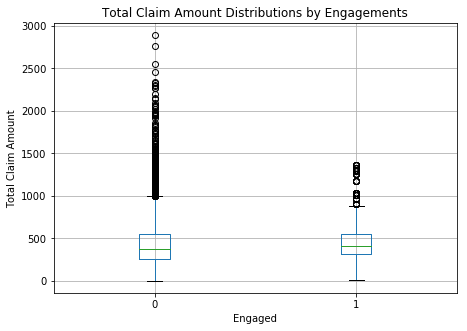

In [29]:
ax=df[['Engaged','Total Claim Amount']].boxplot(
by='Engaged',
showfliers=True,
figsize=(7,5))
ax.set_xlabel('Engaged')
ax.set_ylabel('Total Claim Amount')
ax.set_title('Total Claim Amount Distributions by Engagements')
plt.suptitle("")
plt.show()

# Gelir Dağılımına göre Müşteri Profili

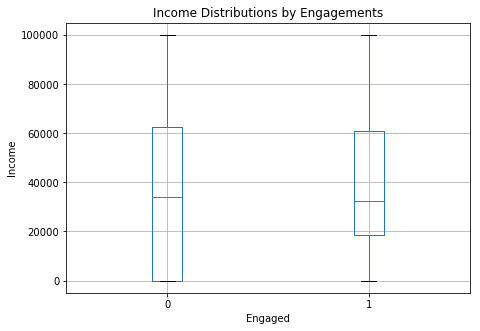

In [30]:
ax=df[['Engaged','Income']].boxplot(
by='Engaged',
showfliers=True,
figsize=(7,5))
ax.set_xlabel('Engaged')
ax.set_ylabel('Income')
ax.set_title('Income Distributions by Engagements')
plt.suptitle("")
plt.show()

# Gelire göre istatistiksel Veriler

In [31]:
df.groupby('Engaged').describe()['Income'].T

Engaged,0,1
count,7826.000000,1308.000000
mean,37509.190008,38544.027523
std,30752.259099,28043.637944
min,0.000000,0.000000
25%,0.000000,18495.000000
50%,34091.000000,32234.000000
75%,62454.250000,60880.000000
max,99981.000000,99845.000000


# Tüm Numerik Verilerin İstatistiksel Analizleri

In [32]:
import statsmodels.formula.api as sm

In [33]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Engaged
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,0.143201
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.350297
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,0.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,0.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,0.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,0.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,1.000000


In [34]:
df['Income'].dtype

dtype('int64')

In [35]:
df['Customer Lifetime Value'].dtype

dtype('float64')

# **REGRESYON ANALİZLERİ**
# Numerik verileri ayrı bir tabloda tutalım

In [36]:
numerik_veriler=['Customer Lifetime Value','Income','Monthly Premium Auto',
                 'Months Since Last Claim','Months Since Policy Inception',
                 'Number of Open Complaints','Number of Policies','Total Claim Amount']

* Logistik Regresyon ile "Engaged" kolonunu Y değişkeni olacak şekilde numerik_veriler ile tahmin etmeye çalışalım 

In [37]:
logit=sm.Logit(df['Engaged'],df[numerik_veriler])

In [38]:
logit_fit=logit.fit()

Optimization terminated successfully.
         Current function value: 0.421189
         Iterations 6


# Eğitilmiş Modelin Detaylı Raporu

In [39]:
logit_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Engaged   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9126
Method:                           MLE   Df Model:                            7
Date:                Wed, 15 May 2019   Pseudo R-squ.:                -0.02546
Time:                        15:56:49   Log-Likelihood:                -3847.1
converged:                       True   LL-Null:                       -3751.6
                                        LLR p-value:                     1.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Customer Lifetime Value       -6.741e-06   5.04e-06     -1.337      0.181   -1.66e-05    3.14e-06
Income                        -2.857e-06   1.03e-06     -2.766      0.006   -4.88e-06   -8.33e-07
Monthly Premium Auto             -0.0084      0.001     -6.889      0.000      -0.011      -0.006
Months Since Last Claim          -0.0202      0.003     -7.238      0.000      -0.026      -0.015
Months Since Policy Inception    -0.0060      0.001     -6.148      0.000      -0.008      -0.004
Number of Open Complaints        -0.0829      0.034     -2.424      0.015      -0.150      -0.016
Number of Policies               -0.0810      0.013     -6.356      0.000      -0.106      -0.056
Total Claim Amount                0.0001      0.000      0.711      0.477      -0.000       0.000
=================================================================================================
"""

# Kategorik Verilerin Regresyon Analizleri

In [40]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Engaged
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,0.143201
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.350297
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,0.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,0.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,0.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,0.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,1.000000


In [41]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Engaged'],
      dtype='object')

In [42]:
df.filter(items=['Gender']).head()

,Gender
0,F
1,F
2,F
3,M
4,M


# Karegorik Verilere ulaşmanın Çeşitli Yöntemleri

1- Faktorizing

In [43]:
gender_values, gender_labels=df['Gender'].factorize()

### factorize() metodu kategorik verileri 1-0 şeklinde encode eder

In [44]:
gender_values

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [45]:
gender_labels

Index(['F', 'M'], dtype='object')

Yukarıda görüldüğü üzere F=0, M=1 olarak encode edilmiştir.

In [46]:
labels, levels=df['Education'].factorize()

In [47]:
labels

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [48]:
levels

Index(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'], dtype='object')

Yukarıda factorize() metodu çalışmamıştır çünkü 5 farklı eğitim seviyesi sözkonusu.

*Categorical* Metodu ile çözeceğiz

In [49]:
categories=pd.Categorical(df['Education'],
                         categories=['High School or Below','Bachelor', 'College', 'Master','Doctor'])

In [50]:
categories.categories

Index(['High School or Below', 'Bachelor', 'College', 'Master', 'Doctor'], dtype='object')

0,1,2,3,4 olarak encode eder

In [53]:
categories.codes

array([1, 1, 1, ..., 1, 2, 2], dtype=int8)

# **get_dummies** metodu ile encode etme

In [54]:
pd.get_dummies(df['Education']).head(10)

,Bachelor,College,Doctor,High School or Below,Master
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
5,1,0,0,0,0
6,0,1,0,0,0
7,0,0,0,0,1
8,1,0,0,0,0
9,0,1,0,0,0


# Encode edilen değişkenlere Gender ve Education u ekleme

In [55]:
df['GenderFactorized']=gender_values
df['EducationFactorized']=categories.codes

In [56]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Engaged,GenderFactorized,EducationFactorized
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,0,0,1
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,0,0,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,0,0,1
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,0,1,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,0,1,1


# Gender ve Education Kategorik verilerine Logistik Regresyon Uygulama

In [57]:
logit=sm.Logit(df['Engaged'],
              df[['GenderFactorized','EducationFactorized']])

In [58]:
logit_fit=logit.fit()

Optimization terminated successfully.
         Current function value: 0.493068
         Iterations 6


In [59]:
logit_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Engaged   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9132
Method:                           MLE   Df Model:                            1
Date:                Wed, 15 May 2019   Pseudo R-squ.:                 -0.2005
Time:                        16:19:28   Log-Likelihood:                -4503.7
converged:                       True   LL-Null:                       -3751.6
                                        LLR p-value:                     1.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
GenderFactorized       -1.1266      0.047    -24.116      0.000      -1.218      -1.035
EducationFactorized    -0.6256      0.021    -29.900      0.000      -0.667      -0.585
=======================================================================================
"""

P değerine bakıldığında, her iki giriş değişkeninin de Engaged çıkış değişkeni ile anlamlı ilişkileri olduğu görülüyor. coef e bakarak, her ikisi de ile negatif korelasyon vardır.  Bu, GenderFactorized'de 1 ile kodlanan erkek müşterilerin daha az olduğunu göstermektedir
kadın müşterilerden daha çok pazarlama çağrıları yapacak, 0 ile kodlanmış
Müşterilerin eğitim düzeyleri yükseldikçe, pazarlama ile ilgisi daha düşüktür çıkarımı yapabiliriz.


# Hem Numerik Hem de Kategorik verilerle Regresyon Analizi Yapma

In [61]:
logit = sm.Logit(
df['Engaged'],
df[['Customer Lifetime Value','Income','Monthly Premium Auto','Months Since Last Claim',
'Months Since Policy Inception','Number of Open Complaints','Number of Policies',
'Total Claim Amount','GenderFactorized','EducationFactorized']])

In [62]:
logit_fit = logit.fit()

Optimization terminated successfully.
         Current function value: 0.420810
         Iterations 6


In [63]:
logit_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Engaged   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9124
Method:                           MLE   Df Model:                            9
Date:                Wed, 15 May 2019   Pseudo R-squ.:                -0.02454
Time:                        16:24:06   Log-Likelihood:                -3843.7
converged:                       True   LL-Null:                       -3751.6
                                        LLR p-value:                     1.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Customer Lifetime Value       -6.909e-06   5.03e-06     -1.373      0.170   -1.68e-05    2.96e-06
Income                         -2.59e-06   1.04e-06     -2.494      0.013   -4.63e-06   -5.55e-07
Monthly Premium Auto             -0.0081      0.001     -6.526      0.000      -0.011      -0.006
Months Since Last Claim          -0.0194      0.003     -6.858      0.000      -0.025      -0.014
Months Since Policy Inception    -0.0057      0.001     -5.827      0.000      -0.008      -0.004
Number of Open Complaints        -0.0813      0.034     -2.376      0.017      -0.148      -0.014
Number of Policies               -0.0781      0.013     -6.114      0.000      -0.103      -0.053
Total Claim Amount                0.0001      0.000      0.943      0.346      -0.000       0.000
GenderFactorized                 -0.1500      0.058     -2.592      0.010      -0.263      -0.037
EducationFactorized              -0.0070      0.027     -0.264      0.792      -0.059       0.045
=================================================================================================
"""

P-değerine bakarak ‘Income’, ‘Monthly Premium Auto’, 'Months Since Last Claim',
'Months Since Policy Inception', Number of Open Complaints’, ‘Number of Policies’ ve
“GenderFactorized” değişkenleri 0,05 anlamlılık düzeyinde önemlidir ve hepsinin 'Engaged' ile negatif korolasyonu vardır

Sonuçlar: 
    Yüksek gelir ve Müşteri politikaları; satış çağrılarına karşı müşterinin bağlılığına negatif etki etmektedir.
    Ayrıca erkek müşteriler kadınlara göre bu satış çağrılarına daha az ulaşılmaktadırlar 
    

# Faydalı olması dileğiyle